# Supplementary figure 10: Permutation test on simulated ECM graphs

In [78]:
import sys
import os
import matplotlib.pyplot as plt 

from collections import Counter

# Third-party library imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Local module imports
os.chdir('C:/Users/Adminn/Documents/GitHub/CEG/src')
from Graph_builder import *  # Import graph-building utilities
from Permutation_test import *  # Import permutation test utilities
from CellECMGraphs_multiple import *  # Import Cell-ECM graph utilities
from Helper_functions import *  # Import helper functions
from SimData_Generator import *

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)


import torch 
from tqdm import tqdm 

In [79]:
from glob import glob
from natsort import natsorted

panel_path = 'C:/Users/Adminn/Documents/GitHub/Cell_ECM_Graphs/simulated_data/simulated_panel.csv'  # Path to panel - with ECM column
cell_data = natsorted(glob('D:/main_figures/figure_4/*ecm*/cell_data/*'))
imc_data = natsorted(glob('D:/main_figures/figure_4/*ecm*/imc_data/*'))
conditions = np.array([0 if 'condition_1' in i else 1 for i in imc_data ])

save_folder = 'Sim_G_results/'


ceg = Cell_ECM_Graphs(full_stack_img_path=imc_data, 
                      panel_path=panel_path,
                      cell_data_path=cell_data,
                      norm='znorm',
                      save_folder=save_folder,
                      node_size=16)


ceg.build_multiple_graphs(Dmax_CC=17, Dmax_CE=7,interaction_k=5, norm='znorm', feature_type='std+mean')
ceg.joint_ecm_clustering()


Building Cell-ECM-Graphs...
ROI 0 complete.
ROI 1 complete.
ROI 2 complete.
ROI 3 complete.
ROI 4 complete.
ROI 5 complete.
ROI 6 complete.
ROI 7 complete.
ROI 8 complete.
ROI 9 complete.
ROI 10 complete.
ROI 11 complete.
ROI 12 complete.
ROI 13 complete.
ROI 14 complete.
ROI 15 complete.
ROI 16 complete.
ROI 17 complete.
ROI 18 complete.
ROI 19 complete.
ROI 20 complete.
ROI 21 complete.
ROI 22 complete.
ROI 23 complete.
ROI 24 complete.
ROI 25 complete.
ROI 26 complete.
ROI 27 complete.
ROI 28 complete.
ROI 29 complete.
ROI 30 complete.
ROI 31 complete.
ROI 32 complete.
ROI 33 complete.
ROI 34 complete.
ROI 35 complete.
ROI 36 complete.
ROI 37 complete.
ROI 38 complete.
ROI 39 complete.
Clustering all ECM patches together ... 


In [80]:
np.argwhere(conditions == 0)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]], dtype=int64)

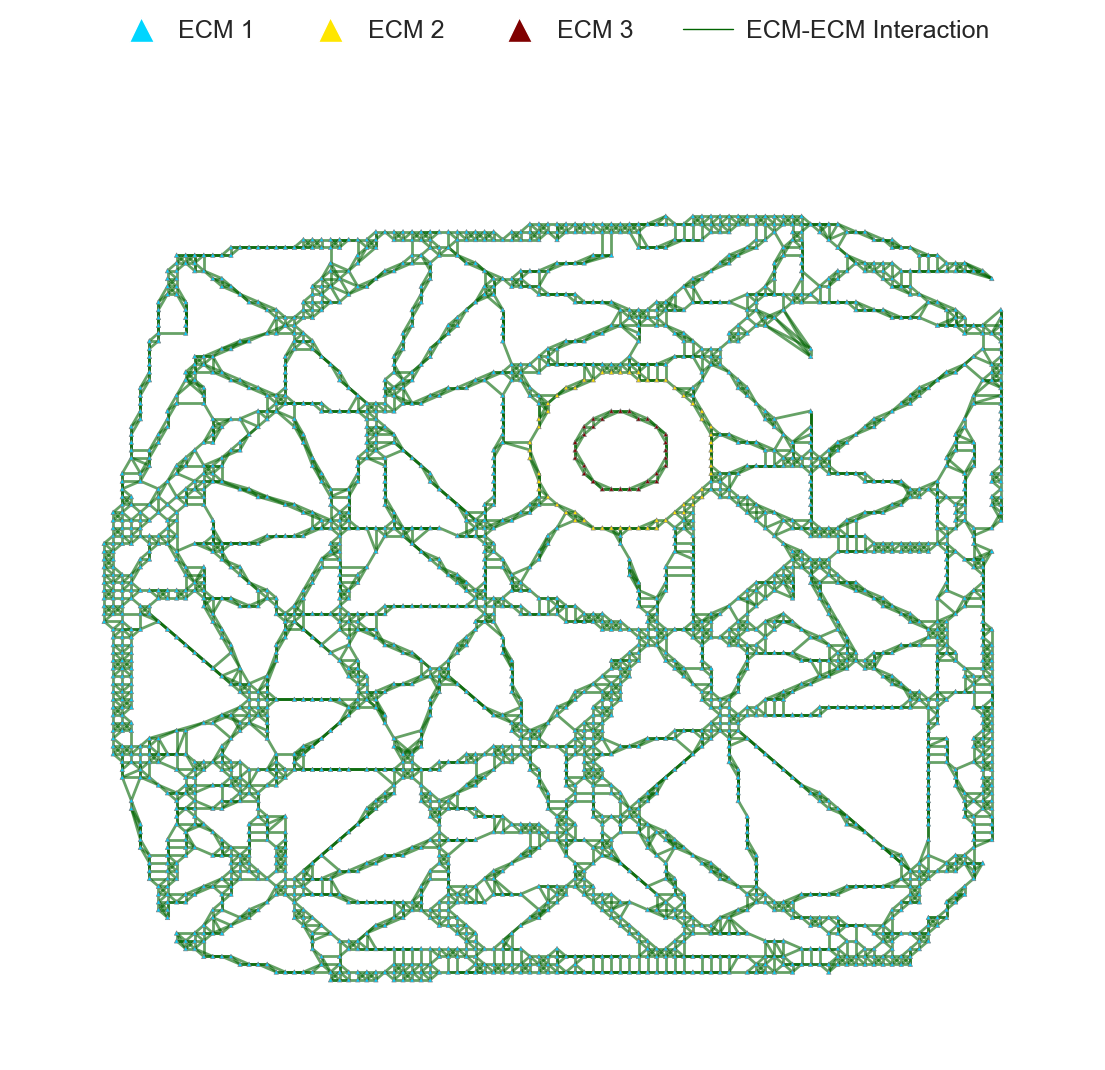

In [81]:
ceg.ceg_dict[0].single = True
ceg.ceg_dict[0].visualize_ecm_ecm_interactions()

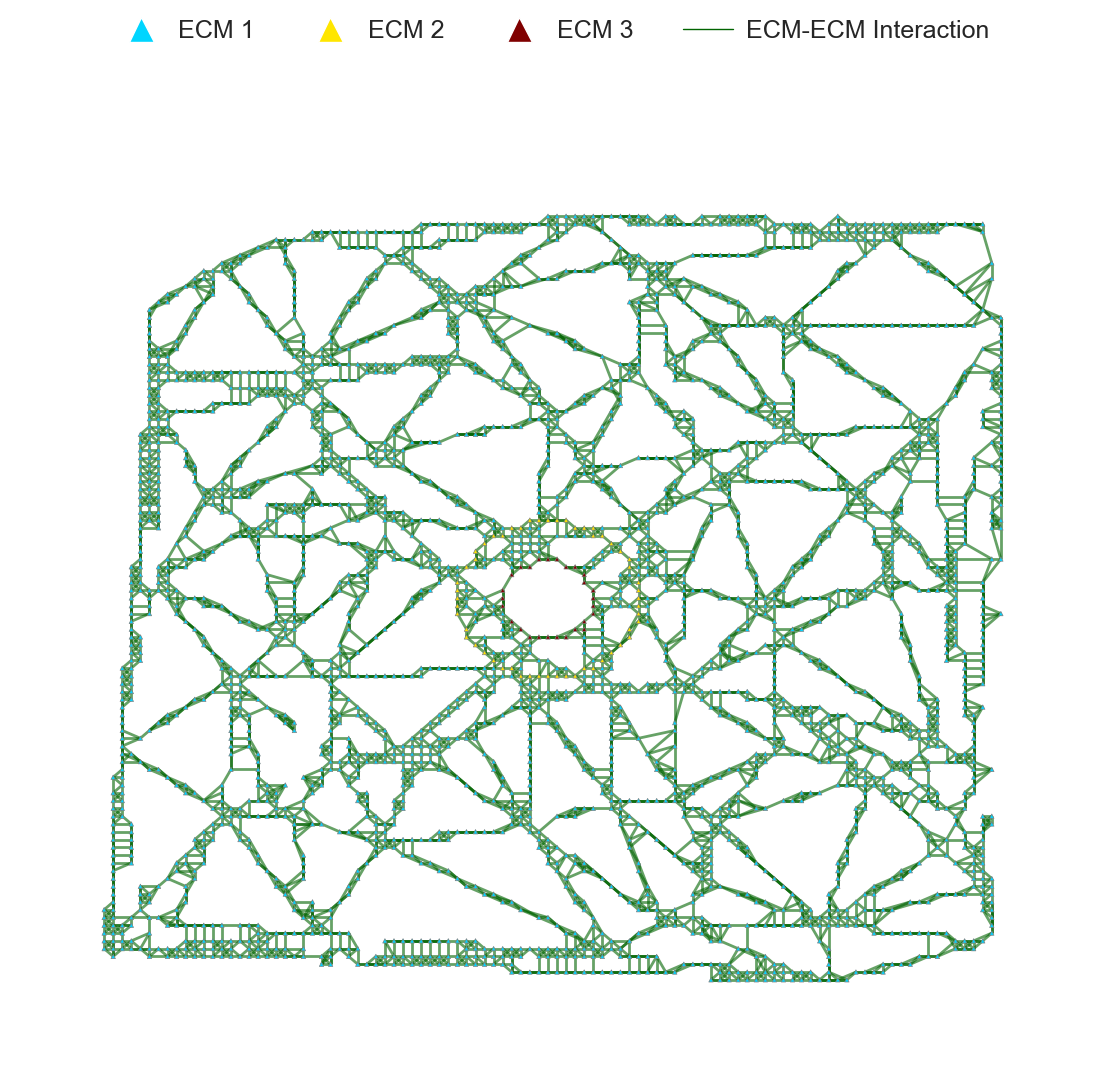

In [82]:
ceg.ceg_dict[20].single = True
ceg.ceg_dict[20].visualize_ecm_ecm_interactions()

In [83]:
df = graph_to_df(ceg.ceg_dict[0])
ecm_df = df[df['cell_or_ecm'] == 'ecm']
ecm_df

,node_id,cell_or_ecm,labels,neighbor_labels
4300,ecm_node1,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A]"
4301,ecm_node2,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A, C..."
4302,ecm_node3,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A, C..."
4303,ecm_node4,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A, C..."
4304,ecm_node5,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A]"
...,...,...,...,...
7201,ecm_node2902,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A, C..."
7202,ecm_node2903,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A]"
7203,ecm_node2904,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A]"
7204,ecm_node2905,ecm,ecm_1,"[ecm_1, ecm_1, ecm_1, ecm_1, Cell A, Cell A]"


In [84]:
df = graph_to_df(ceg.ceg_dict[0])


import ast
ecm_df['neighbor_labels'] = ecm_df['neighbor_labels'].apply(
    lambda neighbors: [label for label in neighbors if 'ecm' in label]
)


In [86]:
result_1 = test_interactions_from_neighbor_labels(
    ecm_df,
    label_col="labels",
    neighbor_col="neighbor_labels",
    iter=1000,
    n_jobs=4
)


































































































































Permutations: 100%|██████████| 1000/1000 [00:12<00:00, 83.01it/s]
C:\Users\Adminn\AppData\Local\Temp\ipykernel_14396\1687280.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.546' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[i, 'p_lt'] = p_lt


In [87]:
df = graph_to_df(ceg.ceg_dict[20])

ecm_df = df[df['cell_or_ecm'] == 'ecm']

import ast
ecm_df['neighbor_labels'] = ecm_df['neighbor_labels'].apply(
    lambda neighbors: [label for label in neighbors if 'ecm' in label]
)


C:\Users\Adminn\AppData\Local\Temp\ipykernel_14396\2012946581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecm_df['neighbor_labels'] = ecm_df['neighbor_labels'].apply(


In [88]:
result_2 = test_interactions_from_neighbor_labels(
    ecm_df,
    label_col="labels",
    neighbor_col="neighbor_labels",
    iter=1000,
    n_jobs=4
)






























































































































Permutations: 100%|██████████| 1000/1000 [00:12<00:00, 81.89it/s]
C:\Users\Adminn\AppData\Local\Temp\ipykernel_14396\1687280.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.363' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[i, 'p_lt'] = p_lt


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_interaction_heatmap(result_df, value_col='ct', sig_col='sigval', cmap='bwr', figsize=(12, 10), annot=True,
                             savename=None):
    # Set publication style for fonts
    sns.set_context("notebook", font_scale=1.5)  # Make fonts bigger overall
    sns.set_style("ticks")  # A clean background for publications

    # Pivot the result to a matrix form for heatmap
    heatmap_data = result_df.pivot_table(
        index='from_label',
        columns='to_label',
        values=value_col,
        aggfunc='mean'
    )

    # Create the figure and axis for the plot
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=annot,
        fmt=".2f",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={"label": value_col},
        mask=heatmap_data.isna(),
        square=True,  # Keep the aspect ratio square
        vmin=heatmap_data.min().min(),  # Ensure color range is from min to max
        vmax=heatmap_data.max().max()   # Same for max value
    )

    # Title and axis labels with larger font size for clarity
    plt.title("Interaction Strength Heatmap", fontsize=22, weight='bold', pad=20)
    plt.xlabel("Extracellular Matrix Clusters", fontsize=20, labelpad=15)
    plt.ylabel("Extracellular Matrix Clusters", fontsize=20, labelpad=15)

    # Customizing tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)

    # Increase colorbar (legend) font size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(value_col, fontsize=18)

    # Adjust layout and make sure everything fits nicely
    plt.tight_layout()

    # Show the plot
    plt.savefig(savename+'.tiff', dpi=600)
    plt.show()


C:\Users\Adminn\AppData\Local\Temp\ipykernel_14396\3917057570.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_1 = result_1.replace('ecm_1', 'ECM 1').replace('ecm_2', 'ECM 2').replace('ecm_3', 'ECM 3')


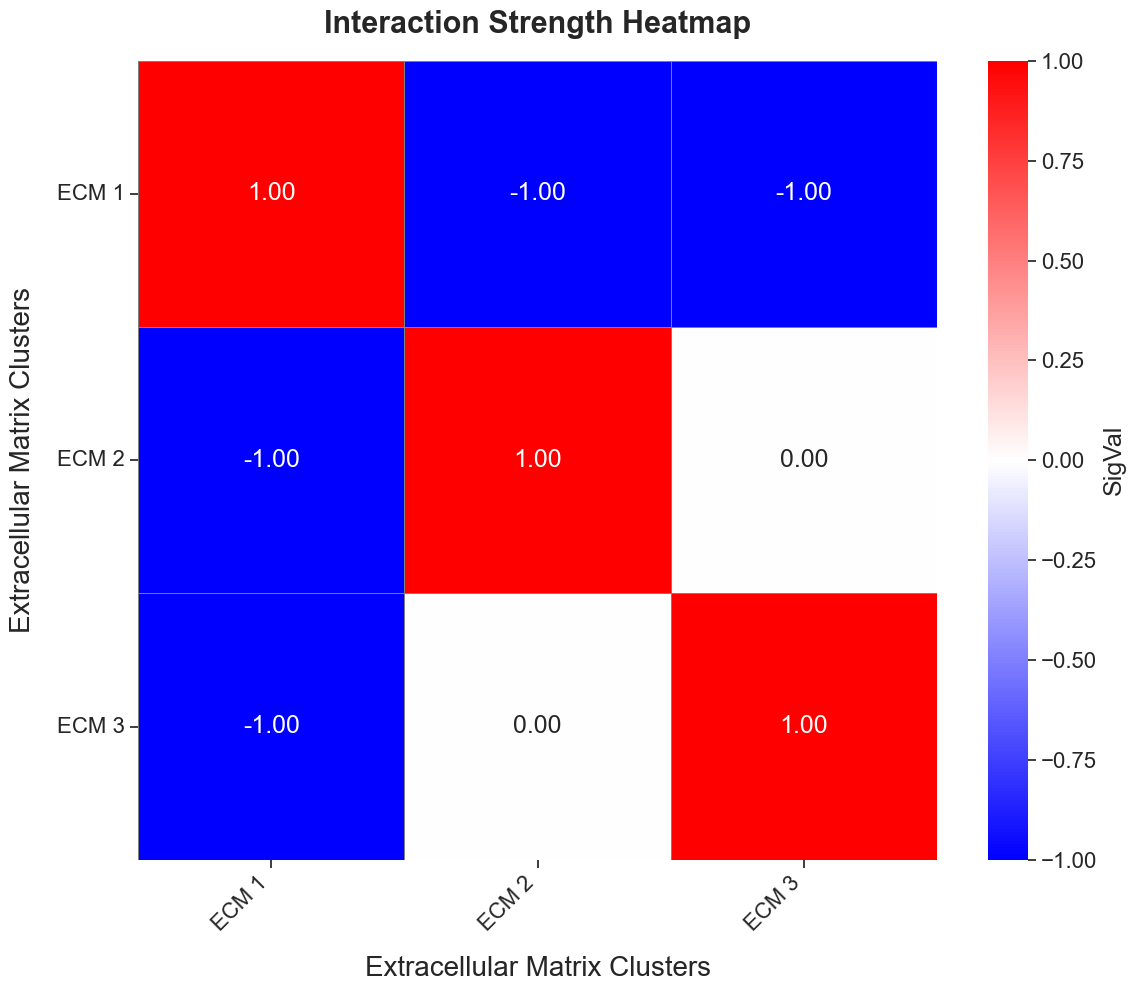

In [90]:
result_1 = result_1.rename(columns={'ct': 'classic edge counts'})
result_1 = result_1.rename(columns={'sigval': 'SigVal'})
result_1 = result_1.replace('ecm_1', 'ECM 1').replace('ecm_2', 'ECM 2').replace('ecm_3', 'ECM 3')
plot_interaction_heatmap(result_1,value_col='SigVal', savename='pt_sim_c1')

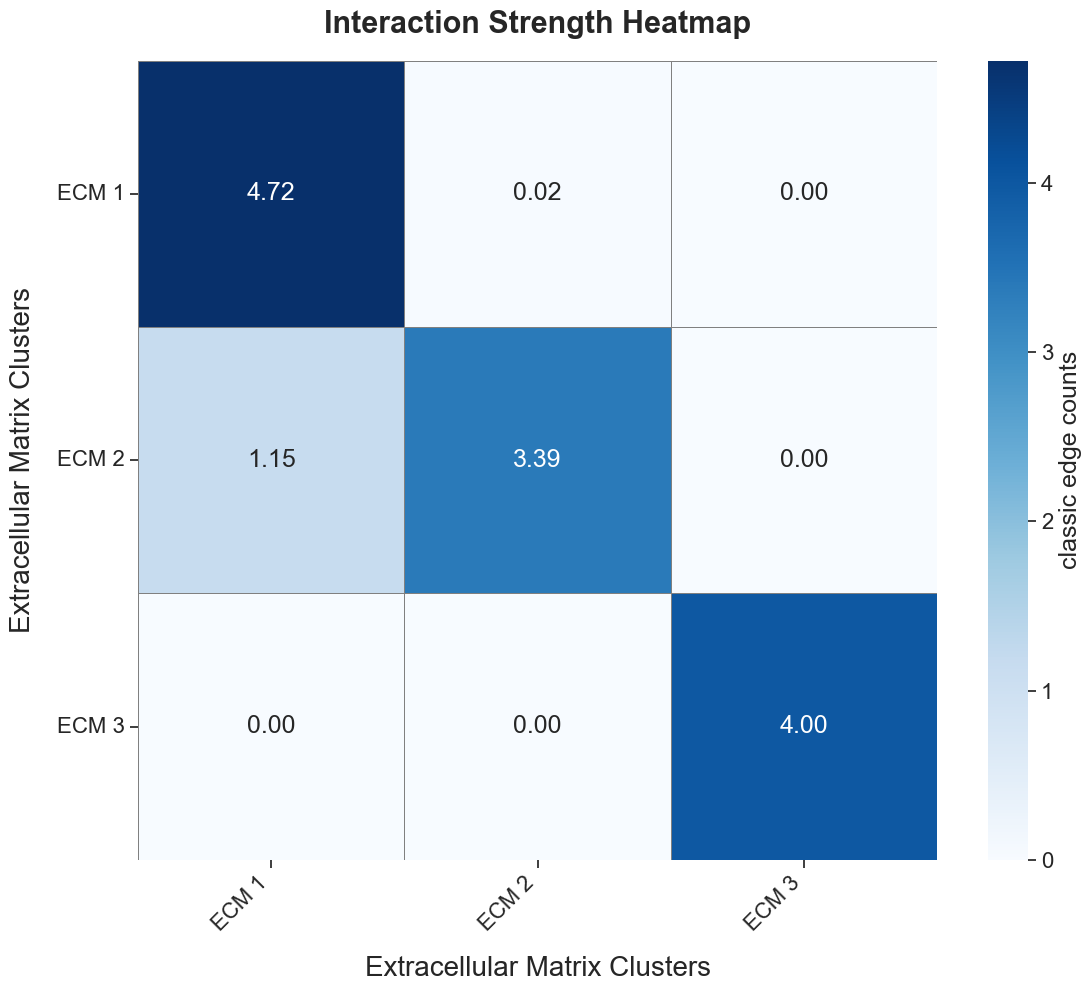

In [91]:
plot_interaction_heatmap(result_1,value_col='classic edge counts',cmap='Blues', savename='pt_sim_c1_ct')

C:\Users\Adminn\AppData\Local\Temp\ipykernel_14396\4125994123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_2 = result_2.replace('ecm_1', 'ECM 1').replace('ecm_2', 'ECM 2').replace('ecm_3', 'ECM 3')


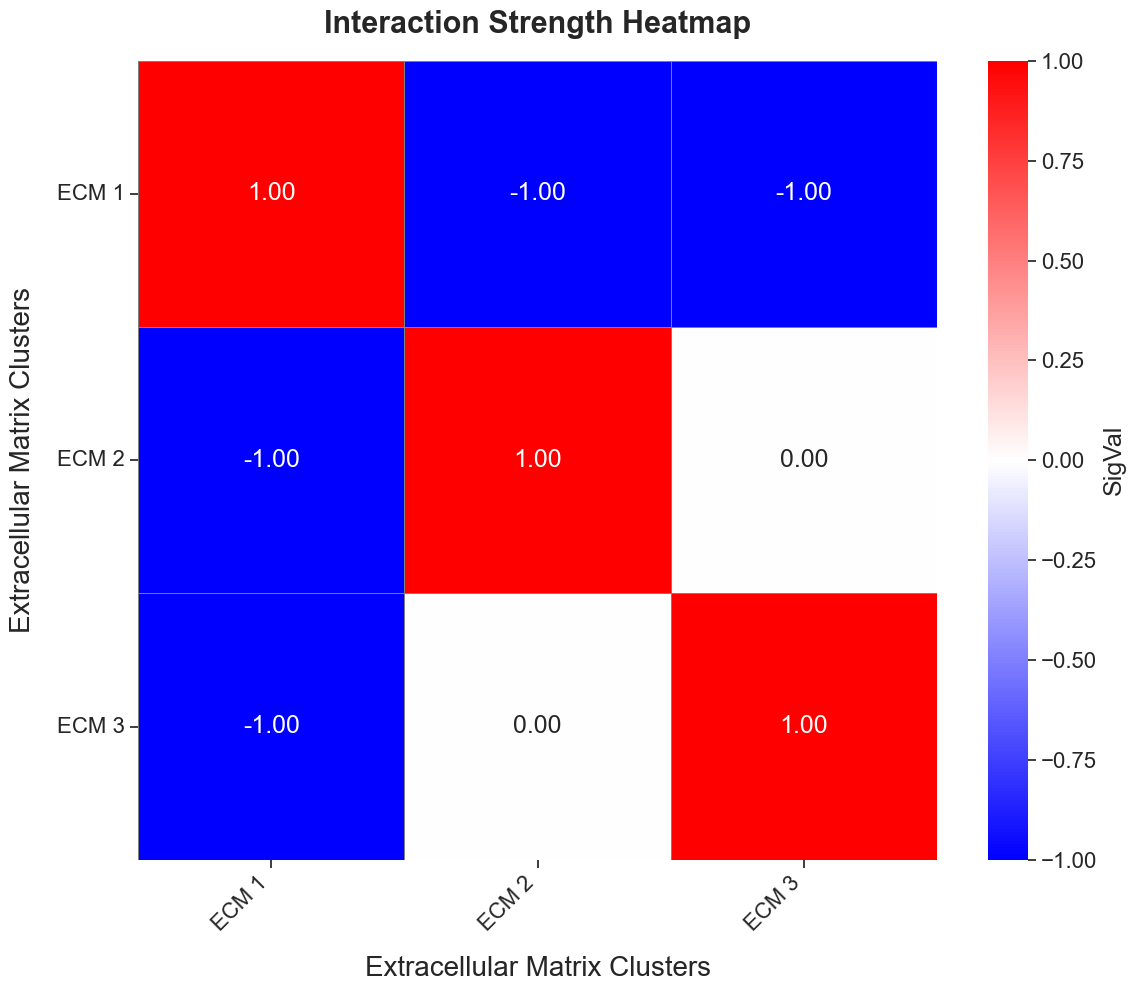

In [92]:
result_2 = result_2.rename(columns={'ct': 'classic edge counts'})
result_2 = result_2.rename(columns={'sigval': 'SigVal'})
result_2 = result_2.replace('ecm_1', 'ECM 1').replace('ecm_2', 'ECM 2').replace('ecm_3', 'ECM 3')
plot_interaction_heatmap(result_2,value_col='SigVal', savename='pt_sim_c2')

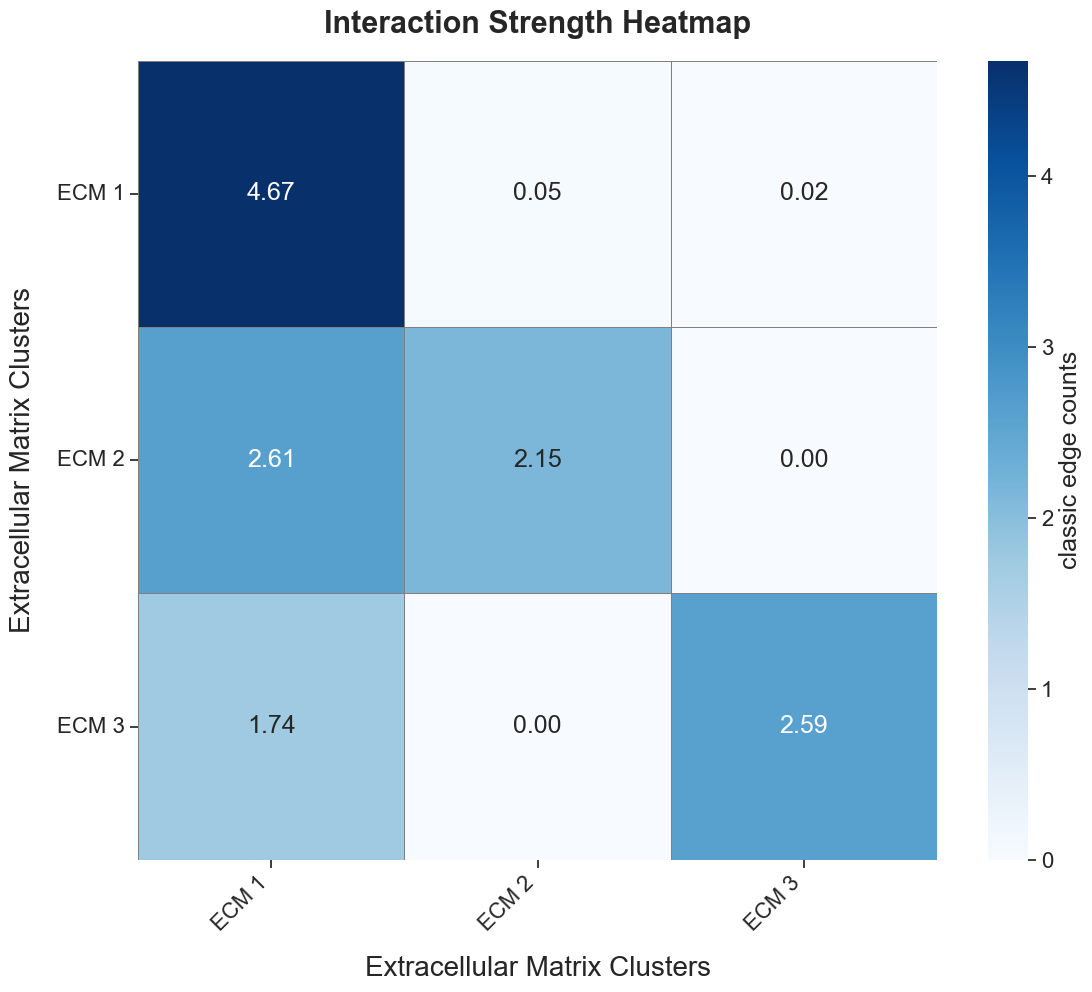

In [93]:
plot_interaction_heatmap(result_2,value_col='classic edge counts',cmap='Blues',  savename='pt_sim_c2_ct')